## 1. Getting started with NLTK

In [1]:
# Get started
import nltk
from nltk.book import *
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib as plt

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [3]:
text9

<Text: The Man Who Was Thursday by G . K . Chesterton 1908>

## Searching through text

1. You can use concordance for a given work
2. You can search for similar words
3. We can search common context for a list of words

### Concordance

See words that surround a given word.

In [4]:
text9.concordance('odd')

Displaying 6 of 6 matches:
nt empty . Then he realised ( in some odd way ) that the silence was rather a l
et smile . There was nothing whatever odd about him , except that he wore a pai
uare - shouldered man in tweeds , not odd save for the accident of his ugly spe
ut it might have struck a stranger as odd that there appeared in his train , no
nnocent world . " Have you noticed an odd thing ," he said , " about all your d
queerer still that I also have had my odd notion about the President , and I al


### Similar
What other words appear in the contenxt of 'odd'?

In [5]:
text9.similar('odd')

to of all certain strange curious indescribable anybody unaccountable


In [6]:
text9.common_contexts(['odd', 'strange'])

some_way


## This part is me doing something

Trying to run dispersion on top words.

In [7]:
# tokenize
text9_tokens = [t.lower() for t in text9 if t.isalpha()]

In [8]:
# get stop words and remove
stop_words = stopwords.words('english')

In [9]:
# Now filter these out
text9_tokens_wo_stops = [t for t in text9_tokens if t not in stop_words]

In [10]:
# Let's run lemmatizing the text
wordnet_lemmatizer = WordNetLemmatizer()
text9_lemma = [wordnet_lemmatizer.lemmatize(t) for t in text9_tokens_wo_stops]

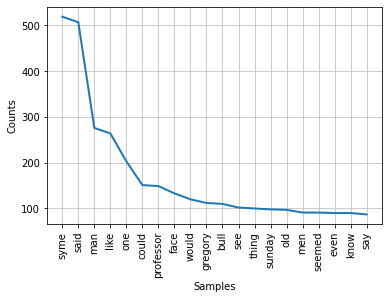

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [11]:
# Lets look at the word frequencies
dist = FreqDist(text9_lemma)
dist.plot(20)

In [12]:
text9.similar('face')

head professor man smile president secretary world back hat voice
sword road enemy sky way him eyes train table forehead


In [13]:
text9.concordance('face')

Displaying 25 of 119 matches:
 long , auburn hair and the impudent face -- that young man was not really a p
 almost saintly oval , however , his face projected suddenly broad and brutal 
 of feathers that almost brushed the face . Across the great part of the dome 
 braids of red hair , but a kindlier face underneath them , laughed with such 
 at him from under level brows ; her face was grave and open , and there had f
 at the girl ' s red hair and amused face for what seemed to be a few minutes 
and long frock coat were black ; the face , in an abrupt shadow , was almost a
." " Very well ," said Gregory , his face darkening , " you shall see somethin
me with his large but indecipherable face . ' You want a safe disguise , do yo
mid a great rumble of applause . His face was deadly pale , so that by contras
Gregory had sat staring at him , his face idiotic with astonishment . Now in t
 you !" cried Gregory , with frantic face and hands . " Stop it , it is all --
od began to crawl back

/Users/kaiprenger/venv/python_class_2022/lib/python3.9/site-packages/nltk/draw/__init__.py:15: UserWarning: nltk.draw package not loaded (please install Tkinter library).
  warnings.warn("nltk.draw package not loaded (please install Tkinter library).")


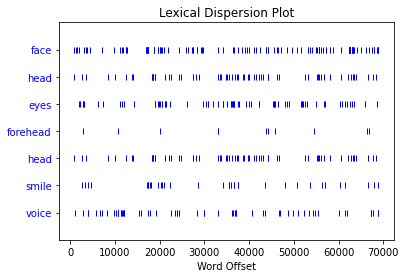

In [14]:
text9.dispersion_plot(['face', 'head', 'eyes', 'forehead', 'head', 'smile', 'voice'])

Just a random exploration to try to understand some common words, and how related words might present something in text9. Let's get back to the NLTK book tutorial.

## Generate

This allows you to try and generate some text in the style of text in the corpus. Cool!

In [15]:
text9.generate()

Building ngram index...


is , and finding a Sunday teashop , turned in his loose straw hat on
the bench under the advice of his hands . , or an apple tree , but not
an anarchist . an hour his talk was a collision . " I ' d better ."
the foundation of solid meekness which lies at the anarchist breakfast
and had been too true . Syme and I did not lie only in a condition of
curious hilarity . for a nightmare to lead to a farcical ingenuity ,
and swung out of the affair , and a great


'is , and finding a Sunday teashop , turned in his loose straw hat on\nthe bench under the advice of his hands . , or an apple tree , but not\nan anarchist . an hour his talk was a collision . " I \' d better ."\nthe foundation of solid meekness which lies at the anarchist breakfast\nand had been too true . Syme and I did not lie only in a condition of\ncurious hilarity . for a nightmare to lead to a farcical ingenuity ,\nand swung out of the affair , and a great'

## Counting vocabulary

In [16]:
# Calculate the length of the text in words
len(text9)

69213

In [22]:
# sorted(set(text9)) # damn this is not helpful due to punctuation and capitalization
sorted(set(text9_tokens_wo_stops[:20]))

['bentley',
 'boys',
 'chesterton',
 'clerihew',
 'cloud',
 'edmund',
 'g',
 'k',
 'man',
 'men',
 'mind',
 'sick',
 'soul',
 'thursday',
 'upon',
 'wailing',
 'weather',
 'went',
 'yea']

In [18]:
# OK, how many unique words without punctuation and case sensitivity
print(len(set(text9)))
print(len(set(text9_tokens_wo_stops)))

6807
6159


In [19]:
text9_tokens.count('aberrations')

1

### Lexical density & percentage

Let's create some functions to work on lexical density and word percentage.

In [20]:
def lexical_density(text):
    return len(set(text)) / len(text)

def percentage(count, total):
    return 100 *  count / total

In [23]:
lexical_density(text9_tokens)

0.10728152033240243

In [25]:
lexical_density(text9)

0.0983485761345412

## 2. A Closer Look at Python: Texts as Lists of Words

### 2.1 Lists

In [26]:
# Representing the first sentence in Moby Dick
sent_1 = ['Call', 'me', 'Ismael', '.']

In [27]:
len(sent_1)

4

In [28]:
lexical_density(sent1)

1.0

In [30]:
sent_2 = ['The', 'family', 'of', 'Dashwood', 'had', 'long', 'been', 'settled', 'in', 'Sussex', '.']

In [31]:
sent_3 = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.']

In [32]:
sent_3 + sent_2

['In',
 'the',
 'beginning',
 'God',
 'created',
 'the',
 'heaven',
 'and',
 'the',
 'earth',
 '.',
 'The',
 'family',
 'of',
 'Dashwood',
 'had',
 'long',
 'been',
 'settled',
 'in',
 'Sussex',
 '.']

In [33]:
sent1.append('Some')

In [34]:
sent1

['Call', 'me', 'Ishmael', '.', 'some']

In [37]:
sent1.extend(['body', 'stop', 'me', '!'])

In [38]:
sent1

['Call', 'me', 'Ishmael', '.', 'some', 'body', 'stop', 'me', '!']

### 2.2 Indexing Lists

You can pick out individual words from a text.

In [41]:
text4[173]

'awaken'

You can also use that work to local the index, probably pretty helpful for trying to trim Project Gutenburg texts of preamble.

In [44]:
text4.index('abandoned')

2113

Of course, you can create sublists by slicing.

In [51]:
text4[165:185]

['my',
 'country',
 'called',
 'me',
 ',',
 'being',
 'sufficient',
 'to',
 'awaken',
 'in',
 'the',
 'wisest',
 'and',
 'most',
 'experienced',
 'of',
 'her',
 'citizens',
 'a',
 'distrustful']

In [52]:
text2[141515:]

['communication',
 'which',
 'strong',
 'family',
 'affection',
 'would',
 'naturally',
 'dictate',
 ';--',
 'and',
 'among',
 'the',
 'merits',
 'and',
 'the',
 'happiness',
 'of',
 'Elinor',
 'and',
 'Marianne',
 ',',
 'let',
 'it',
 'not',
 'be',
 'ranked',
 'as',
 'the',
 'least',
 'considerable',
 ',',
 'that',
 'though',
 'sisters',
 ',',
 'and',
 'living',
 'almost',
 'within',
 'sight',
 'of',
 'each',
 'other',
 ',',
 'they',
 'could',
 'live',
 'without',
 'disagreement',
 'between',
 'themselves',
 ',',
 'or',
 'producing',
 'coolness',
 'between',
 'their',
 'husbands',
 '.',
 'THE',
 'END']

I'm skipping the next few sections, and they're basically talking about variables and strings.

## 3. Computing with Language: Simple Statistics

In [54]:
## There's a test to make sure you understand slicing; I'll guess that the answer is 'said than'
saying = ['After', 'all', 'is', 'said', 'and', 'done', 'more', 'is', 'said', 'than', 'done']
tokens = set(saying)
tokens = sorted(tokens)
tokens[-2:]

['said', 'than']

### 3.1 Frequency Distribution

In order to find the most frequently used words, we might take a tally. Frequency distrution (`FreqDist`) could help

In [56]:
fdist9 = FreqDist(text9)
fdist9

FreqDist({',': 3488, 'the': 3291, '.': 2717, 'a': 1713, 'of': 1710, 'and': 1568, '"': 1336, 'to': 1045, 'in': 888, 'I': 885, ...})

In [59]:
real_fdist9 = FreqDist(text9_tokens_wo_stops)
real_fdist9

FreqDist({'syme': 519, 'said': 507, 'man': 276, 'like': 264, 'one': 199, 'could': 151, 'professor': 149, 'would': 120, 'face': 119, 'gregory': 112, ...})

In [60]:
# How about top ten
real_fdist9.most_common(10)

[('syme', 519),
 ('said', 507),
 ('man', 276),
 ('like', 264),
 ('one', 199),
 ('could', 151),
 ('professor', 149),
 ('would', 120),
 ('face', 119),
 ('gregory', 112)]

In [63]:
# You can also index a word to get the count
real_fdist9['forehead']

11

In [65]:
# How about words that only occur once, or hapaxes?
text9_hapaxes = real_fdist9.hapaxes()

In [66]:
len(text9_hapaxes)

3079

### 3.2 Fine-grained Selection of Words

Let's try to look at the longer words of text9.

In [68]:
text9_dedupe = set(text9)
long_words = [w for w in text9_dedupe if len(w) > 15]
sorted(long_words)

['incomprehensible', 'undenominational']

This is me having some fun now with these longer words.

In [71]:
text9.concordance('incomprehensible')

Displaying 4 of 4 matches:
out of the room , shaking with incomprehensible scorn . Four of the men left b
 He had a vague idea , if this incomprehensible old Jack - in - the - box was 
is fears fully returned . This incomprehensible man from the fierce council , 
se there was silence , and the incomprehensible went on . " But you were men .


In [72]:
text9.concordance('undenominational')

Displaying 1 of 1 matches:
hools !" said Syme . " Is this undenominational education ?" " No ," said the 


Fun is over. Back to NLTK book!!!

Those long words are often hapaxes. What if we only looked at slightly longer words that have a reasonable frequency distirbution in the text.

In [76]:
seven_and_seven = sorted(w for w in set(text9_tokens_wo_stops) if len(w) > 7 and real_fdist9[w] > 7)

In [77]:
seven_and_seven

['abruptly',
 'accident',
 'adventures',
 'afterwards',
 'anarchist',
 'anarchists',
 'answered',
 'anything',
 'beautiful',
 'breakfast',
 'breaking',
 'buildings',
 'business',
 'carriages',
 'certainly',
 'chairman',
 'champagne',
 'christians',
 'comrades',
 'continued',
 'contrast',
 'conversation',
 'criminal',
 'curiosity',
 'dangerous',
 'darkness',
 'detective',
 'distance',
 'dynamiter',
 'election',
 'elephant',
 'enormous',
 'especially',
 'everyone',
 'everything',
 'extraordinary',
 'followed',
 'forehead',
 'frightful',
 'gentleman',
 'gentlemen',
 'gradually',
 'horrible',
 'humanity',
 'impression',
 'innkeeper',
 'innocent',
 'inspector',
 'intellectual',
 'laughing',
 'laughter',
 'leicester',
 'nonsense',
 'ordinary',
 'original',
 'paralytic',
 'particular',
 'passionate',
 'pleasure',
 'poetical',
 'policeman',
 'policemen',
 'position',
 'possible',
 'practical',
 'presence',
 'president',
 'probably',
 'professor',
 'question',
 'ratcliffe',
 'realised',
 'remem

In [78]:
len(seven_and_seven)

105

### 3.3 Collocations and Bigrams

A collocation is a sequence of words that occur together unusually often. Thus red wine is a collocation, whereas the wine is not. A characteristic of collocations is that they are resistant to substitution with words that have similar senses; for example, maroon wine sounds definitely odd.

In [79]:
list(bigrams(saying))

[('After', 'all'),
 ('all', 'is'),
 ('is', 'said'),
 ('said', 'and'),
 ('and', 'done'),
 ('done', 'more'),
 ('more', 'is'),
 ('is', 'said'),
 ('said', 'than'),
 ('than', 'done')]

Here we see that the pair of words than-done is a bigram, and we write it in Python as ('than', 'done'). 
Now, collocations are essentially just frequent bigrams, except that we want to pay more attention to 
the cases that involve rare words. In particular, we want to find bigrams that occur more often than 
we would expect based on the frequency of the individual words. The collocations() function does this 
for us. We will see how it works later.

In [80]:
text9.collocations()

said Syme; asked Syme; Saffron Park; Comrade Gregory; Leicester
Square; Colonel Ducroix; red hair; old gentleman; could see; Inspector
Ratcliffe; Anarchist Council; blue card; Scotland Yard; dark room;
blue eyes; common sense; straw hat; hundred yards; said Gregory; run
away


Ha! "Common sense" seems appropriate for Chesterton!

### 3.4 Counting Other Things

A distribution of word lengths in a text, by creating a FreqDist out of a long list of numbers, where each number is the length of the corresponding word in the text.

In [83]:
count_word_length = [len(w) for w in text9]

In [84]:
new_fdisk_text9 = FreqDist(count_word_length)

In [85]:
new_fdisk_text9

FreqDist({3: 13759, 1: 11957, 4: 11418, 2: 11363, 5: 6550, 6: 4623, 7: 3820, 8: 2194, 9: 1853, 10: 924, ...})

In [86]:
new_fdisk_text9.most_common()

[(3, 13759),
 (1, 11957),
 (4, 11418),
 (2, 11363),
 (5, 6550),
 (6, 4623),
 (7, 3820),
 (8, 2194),
 (9, 1853),
 (10, 924),
 (11, 352),
 (12, 243),
 (13, 102),
 (14, 44),
 (15, 6),
 (16, 5)]

In [87]:
new_fdisk_text9.max()

3

In [88]:
new_fdisk_text9[3]

13759

In [89]:
new_fdisk_text9.freq(3)

0.1987921344256137

From this we see that the most frequent word length is 3, and that words of length 3 account for roughly 50,000 (or 20%) of the words making up the book. Could be interested in comparisons between authors and genres.

## Ending without part 4 & 5 of the first chapter

Part 4 is about Python in general, lists, for loops, code blocks. Doesn't seem specific to NLP or NLTK, and already understood.